In [1]:
import cv2, numpy as np
import matplotlib.pyplot as plt
#from matplotlib import rcParams
from utils import hconcat_del
#plt.rcParams.update({'axes.axis': 'off'})
#plt.rcParams['axes.axisbelow'] = False
rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}
plt.rcParams.update(rc)

# Basics

### Import
* Default color space of opencv is BGR (Blue Green Red), instead of usual RGB (Red Green Blue)

imread [docs](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)
; imread [flags](https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#gga61d9b0126a3e57d9277ac48327799c80af660544735200cbe942eea09232eb822)

<i>matplitlib needs a 'gray' colormap in order to show grayscale images properly. Alternatively, you can cast image to RGB</i>

Import image data type:
 Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------



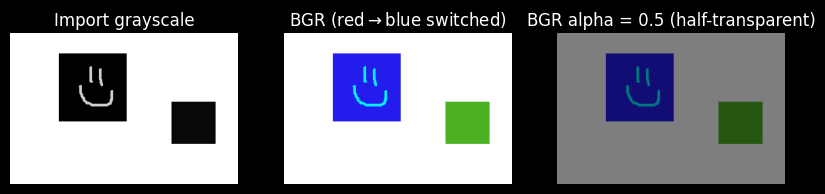

In [93]:
fig,ax = plt.subplots(1,3, figsize = (10,3), facecolor = 'black')
img_rect_path = r'data_processing/media/rect.png'
img_gray            = cv2.imread(   img_rect_path   , flags=cv2.IMREAD_GRAYSCALE)
img_bgr             = cv2.imread(   img_rect_path   , flags=cv2.IMREAD_COLOR)       # 3 channs BGR
img_unchanged       = cv2.imread(   img_rect_path   , flags=cv2.IMREAD_UNCHANGED)   # 4 channs BGR

data_type_info = np.iinfo(img_gray.dtype)
print('Import image data type:\n',data_type_info)
img_unchanged[:,:,3] = int(0.5*data_type_info.max)  # 4th channel to 0.5*max

ax[0].imshow(img_gray, 'gray')
ax[0].set_title('Import grayscale', color='white')
ax[1].imshow(img_bgr)
ax[1].set_title(r'BGR (red$\rightarrow$blue switched)', color='white')
ax[2].set_facecolor('black')
ax[2].imshow(img_unchanged)
ax[2].set_title('BGR alpha = 0.5 (half-transparent)', color='white');


### Change color space


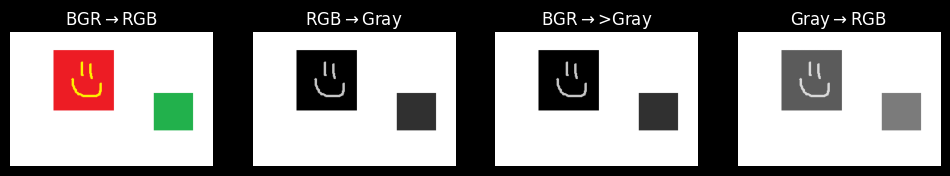

In [94]:
img_gray_bgr        = cv2.cvtColor( img_bgr         , cv2.COLOR_BGR2GRAY)  
img_rgb_bgr         = cv2.cvtColor( img_bgr         , cv2.COLOR_BGR2RGB) 
img_rgb_gray        = cv2.cvtColor( img_gray_bgr    , cv2.COLOR_GRAY2RGB)
img_gray_rgb        = cv2.cvtColor( img_rgb_bgr     , cv2.COLOR_RGB2GRAY) 

fig,ax = plt.subplots(1,4, figsize = (12,3), facecolor = 'black')

ax[0].imshow(img_rgb_bgr)
ax[0].set_title(r'BGR$\rightarrow$RGB', color='white')
ax[1].imshow(img_gray_rgb, 'gray')
ax[1].set_title(r'RGB$\rightarrow$Gray', color='white');
ax[2].imshow(img_gray_bgr, 'gray')
ax[2].set_title(r'BGR$\rightarrow$>Gray', color='white')
ax[3].imshow(img_rgb_gray)
ax[3].set_title(r'Gray$\rightarrow$RGB', color='white');


For some reason importing as gray scale is not the sames as importing original and converting

### Binarize & Invert

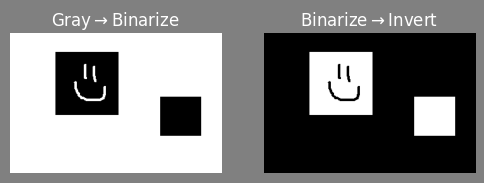

In [96]:
_, img_binary = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
img_invert = 255 - img_binary

fig,ax = plt.subplots(1,2, figsize = (6,3), facecolor = 'Gray')

ax[0].imshow(img_binary, 'gray')
ax[0].set_title(r'Gray$\rightarrow$Binarize', color='white')
ax[1].imshow(img_invert, 'gray')
ax[1].set_title(r'Binarize$\rightarrow$Invert', color='white');
